# Datasets and grouping 

The functionality we have covered so far is fantastic, but what if we want to group arrays together in some kind of coherent way?

Don't worry `xarray` has us covered with a `Dataset`. Lets make a few arrays and combine them in a dataset.

In [1]:
import xarray as xr
import numpy as np

/home/507/hio507/.local/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


## One dimensional example

We are going to start with a dataset that shares a single dimension just to get the hang of how datasets work.

Our problem statement is that have several harmonic oscillator, modelling several springs, and we want to keep track of their motion over time. The motion of a harmonic oscillator is given by:

$ x(t) = A cos({\omega t + \phi}) $

Where $A$ is the amplitude, $\omega$ is the angular frequency and $\phi$ is the phase shift. These values are determined by the initial positions and velocities of the spring as well as the mass and stiffness of  the spring, but lets not get too into that, the primary purpose here is to learn how we are going to deal with our dataset using xarray!

First lets define a function that propogates our harmonic oscillator over time:

In [2]:
def harmonic(A,t,omega,phi):
    x_t = A*np.cos(omega*t + phi)
    return x_t

Okay now lets make a time domain for us to propogate over

In [3]:
npoints = 1000
time_domain = xr.DataArray(np.arange(npoints), dims=("t"), coords={"t":np.arange(npoints)})
time_domain

<xarray.DataArray (t: 1000)>
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
...
       741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753,
       754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766,
       767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779,
       780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792,
       793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805,
       806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818,
       819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831,
       832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844,
       845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857,
       858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870,
       871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883,
       884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896,
       897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909,
       910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922,
       923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935,
       936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948,
       949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961,
       962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974,
       975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987,
       988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 ... 991 992 993 994 995 996 997 998 999

In [4]:
#initial conditions
A = 100
omega = 0.1
phi = 0.1


Once again we use the very handy `xr.apply_ufunc` to apply our function in a vectorised way accross our domain.

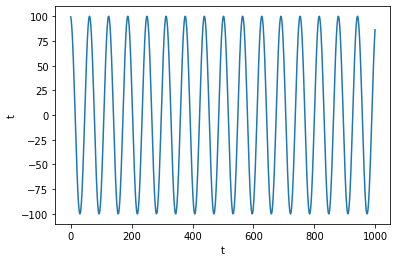

In [5]:
result = xr.apply_ufunc(harmonic,A,time_domain.t,omega,phi)
result.plot()

### Challenge

Try with some different intitial conditions.

Okay cool! That looks a lot like harmonic oscillation. Now lets make a **collection** of them with random intial conditions!

In [6]:
oscillators = {}

n_oscillators = 100

for i in range(n_oscillators):
    
    #initial conditions
    A = np.random.rand()*100
    omega = np.random.rand()
    phi = np.random.rand()
    
    # apply over array
    result = xr.apply_ufunc(harmonic,A,time_domain.t,omega,phi)
    
    # add metadata
    result.attrs["A"] = A
    result.attrs["phi"] = phi
    result.attrs["omega"] = omega
    
    tag = "oscillator_" + str(i)
    oscillators[tag] = result

Lets plot an oscillator in our dictionary of oscillators

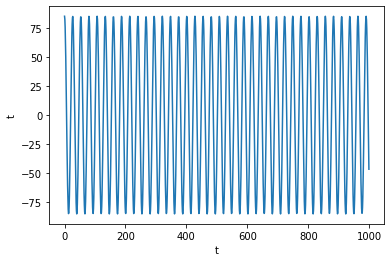

In [7]:
oscillators["oscillator_6"].plot()

Okay this is good but our oscillators actually the **same time axis**. This is the core of the xarray dataset concept, arrays with the same **named dimensions** share a coordinate system. 

Lets turn our `dict` of oscillators into a `DataSet` and play around with it a bit. Make sure to expand the `Data Variables` tab to have a look at our 100 oscillators.

In [8]:
dataset = xr.Dataset(data_vars=oscillators)
dataset

<xarray.Dataset>
Dimensions:        (t: 1000)
Coordinates:
  * t              (t) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
Data variables: (12/100)
    oscillator_0   (t) float64 17.73 15.05 8.365 -0.5465 ... 5.64 13.27 17.37
    oscillator_1   (t) float64 93.78 78.78 50.56 13.87 ... -94.41 -92.13 -74.4
    oscillator_2   (t) float64 6.863 4.328 1.369 -1.723 ... 9.117 9.857 9.634
    oscillator_3   (t) float64 30.2 18.04 0.8788 -16.53 ... -29.01 -15.94 1.539
    oscillator_4   (t) float64 37.54 31.81 22.27 10.05 ... -14.29 -25.77 -34.17
    oscillator_5   (t) float64 37.46 22.88 -0.2879 -23.35 ... 32.19 39.62 32.17
    ...             ...
    oscillator_94  (t) float64 44.63 6.489 -37.2 -49.08 ... -35.89 8.379 45.48
    oscillator_95  (t) float64 77.41 14.97 -60.95 -81.97 ... 82.12 60.5 -15.61
    oscillator_96  (t) float64 56.33 17.15 -25.99 -63.13 ... 36.67 -5.85 -47.02
    oscillator_97  (t) float64 49.62 41.68 28.51 11.78 ... -51.27 -49.87 -42.22
    oscillator_98  (t) float64 54.88 53.82 52.72 51.58 ... -46.62 -45.28 -43.9
    oscillator_99  (t) float64 68.46 47.59 16.05 -19.08 ... 62.01 73.82 69.09

In [9]:
dataset["oscillator_6"] # a dataset is a dictionary-like container

<xarray.DataArray 'oscillator_6' (t: 1000)>
array([ 85.15557272,  82.62456751,  75.5572202 ,  64.34154983,
        49.59333109,  32.12228642,  12.88762973,  -7.05459735,
       -26.60950541, -44.70347003, -60.34307707, -72.66966417,
       -81.00646388, -84.89576034, -84.12401926, -78.73361159,
       -69.02048723, -55.51792649, -38.96726136, -20.2771741 ,
        -0.47380781,  19.35557198,  38.12227153,  54.79594147,
        68.46114622,  78.36762412,  83.97147918,  84.96504255,
        81.29376458,  73.15920966,  61.00798982,  45.50724428,
        27.50801149,   7.99850453, -11.95014485, -31.24269464,
       -48.8199247 , -63.71679121, -75.11541051, -82.38996346,
       -85.14105479, -83.21764116, -76.72532387, -66.02055104,
       -51.69104754, -34.52354703, -15.46059794,   4.45118539,
        24.11858499,  42.46180032,  58.47373262,  71.27527771,
        80.16359151,  84.65067835,  84.49018338,  79.69091829,
        70.51637744,  57.47027126,  41.26887097,  22.80168312,
         3.08261296, -16.80570211, -35.7713326 , -52.77300725,
       -66.87728199, -77.30978889, -83.49775134, -85.10143122,
       -82.0327816 , -74.46028074, -62.79968215, -47.69118847,
       -29.9643023 , -10.59228407,   9.36128304,  28.800887  ,
        46.65923396,  61.95584592,  73.85089196,  81.6912976 ,
...
       -65.40647062, -76.30147008, -83.00728489, -85.15574523,
       -82.62889407, -75.56546326, -64.35325683, -49.60785928,
       -32.13883815, -12.90529626,   7.03678596,  26.59252706,
        44.68825689,  60.33046439,  72.66034441,  81.00094874,
        84.89435261,  84.12679623,  78.74042079,  69.03095482,
        55.53147777,  38.98315232,  20.29453228,   0.49168019,
       -19.33816665, -38.10628885, -54.78225895, -68.45051506,
       -78.36062801, -83.96850222, -84.9662482 , -81.29908663,
       -73.16835592, -61.02045813, -45.5223501 , -27.52492546,
        -8.01629801,  11.93244877,  31.22606753,  48.80527943,
        63.70493185,  75.10698819,  82.38544058,  85.14067967,
        83.2214344 ,  76.73307721,  66.0318388 ,  51.70524998,
        34.53988439,  15.47817325,  -4.43333706, -24.10144357,
       -42.44630693, -58.4607379 , -71.2654951 , -80.15755811,
       -84.64872541, -84.49241813, -79.69721803, -70.52639629,
       -57.48345916, -41.28450386, -22.81890271,  -3.10047384,
        16.78818055,  35.75511235,  52.75897886,  66.86621565,
        77.30229219,  83.49423586,  85.10208998,  82.03757842,
        74.46895226,  62.81175229,  47.70599453,  29.9810314 ,
        10.61001771,  -9.34351848, -28.78406686, -46.64428171])
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 ... 991 992 993 994 995 996 997 998 999
Attributes:
    A:        85.15962649722036
    phi:      0.009757298492582556
    omega:    0.23485339461015498

Note that we recorded the values of our variables in our model as `attrs` on each `DataArray`

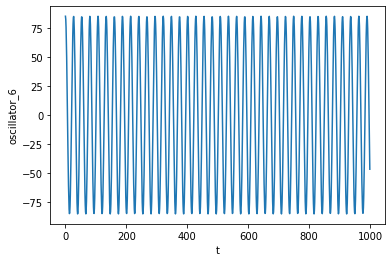

In [10]:
dataset.oscillator_6.plot()

Ok cool, we can play with our dataset nicely.

Now lets use the power of the `Dataset` and its shared coordinate axes. We are going to find the largest oscillator positions away from the equilibrium position (0) accross **all of our oscillators**.

In [11]:
# works across our 100 arrays
np.abs(dataset).max()

<xarray.Dataset>
Dimensions:        ()
Data variables: (12/100)
    oscillator_0   float64 17.74
    oscillator_1   float64 95.45
    oscillator_2   float64 9.893
    oscillator_3   float64 34.05
    oscillator_4   float64 38.89
    oscillator_5   float64 39.62
    ...             ...
    oscillator_94  float64 50.32
    oscillator_95  float64 84.15
    oscillator_96  float64 89.86
    oscillator_97  float64 51.53
    oscillator_98  float64 65.78
    oscillator_99  float64 74.22

### Challenge

Perform a transformation on our dataset by taking the `sin` of our dataset and plotting an oscillator

In [12]:
# Perform a transformation on our dataset by taking the sin of our dataset and plotting an oscillator

<details><summary><b>Solution</b></summary>
   <pre>
    <br> np.sin(dataset).oscillator_1.plot()
   </pre>
</details>

Awesome work! We now know how to work with a `Dataset`, even if this one is rather simple and only has one shared dimension. We will soon work with one that has more complexity and more shared dimensions. 

We can save our dataset to a netcdf file using a similar API to what we used for a `DataArray`

In [13]:
dataset.to_netcdf("oscillators.nc")

In [14]:
reloaded = xr.open_dataset("oscillators.nc")

/home/507/hio507/.local/lib/python3.9/site-packages/xarray/backends/plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [15]:
reloaded["oscillator_6"]

<xarray.DataArray 'oscillator_6' (t: 1000)>
array([ 85.155573,  82.624568,  75.55722 , ...,  -9.343518, -28.784067,
       -46.644282])
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 ... 991 992 993 994 995 996 997 998 999
Attributes:
    A:        85.15962649722036
    phi:      0.009757298492582556
    omega:    0.23485339461015498

## Conclusion

Now you know how to use a `Dataset`! We are going to look at a more complex dataset example now.

**Jump over to [Notebook 3](./xarray_example_03.ipynb) now.** 